In [1]:
from google.colab import files
files.upload()

Saving train.csv to train.csv


{'train.csv': b"player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,defending_skills,passing_skills,dribbling_skills,shot_accuracy,body_strength_stamina,max_running_speed,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection\nPLID_4964,Keva Horan,23,M,Ukraine,6'2,176lbs,77.0,58.0,47.0,59.0,41.0,73.0,13.0,69.0,70.0,36.0,50.0,72.0,24.4,Right,7.7,,8.1,2.0,High,Talent Hunt,8.0,0.0,1\nPLID_11234,Herma Tann,18,M,Russia,5'10,148lbs,54.0,69.0,70.0,62.0,53.0,43.0,10.0,30.0,50.0,30.0,53.0,54.0,22.6,Any,5.3,0.0,,3.0,Medium,Source,3.0,0.0,0\nPLID_19127,Eilene Kizer,16,F,Spain,6'2,172lbs,34.0,43.0,45.0,69.0,49.0,45.0,10.0,57.0,37.0,18.0,,66.0,23.2,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1\nPLID_17467,Andrea Badgett,27,M,Chile,5'11,165lbs,79.0,73.0,76.0,86.0,81.0,80.0,3.0,85.0,80.0

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('train.csv')




<Figure size 1200x800 with 0 Axes>

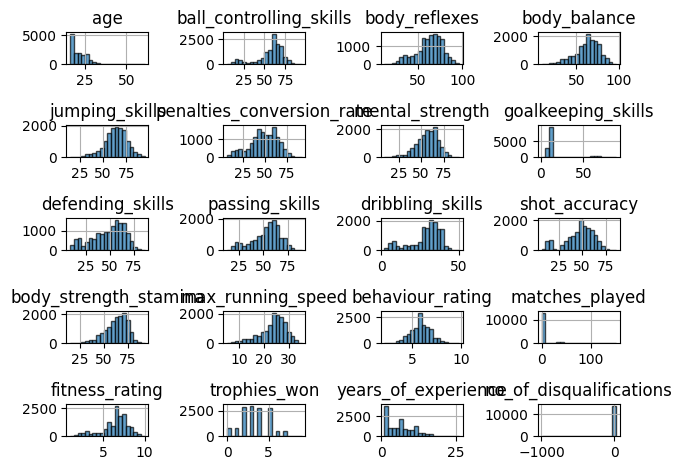

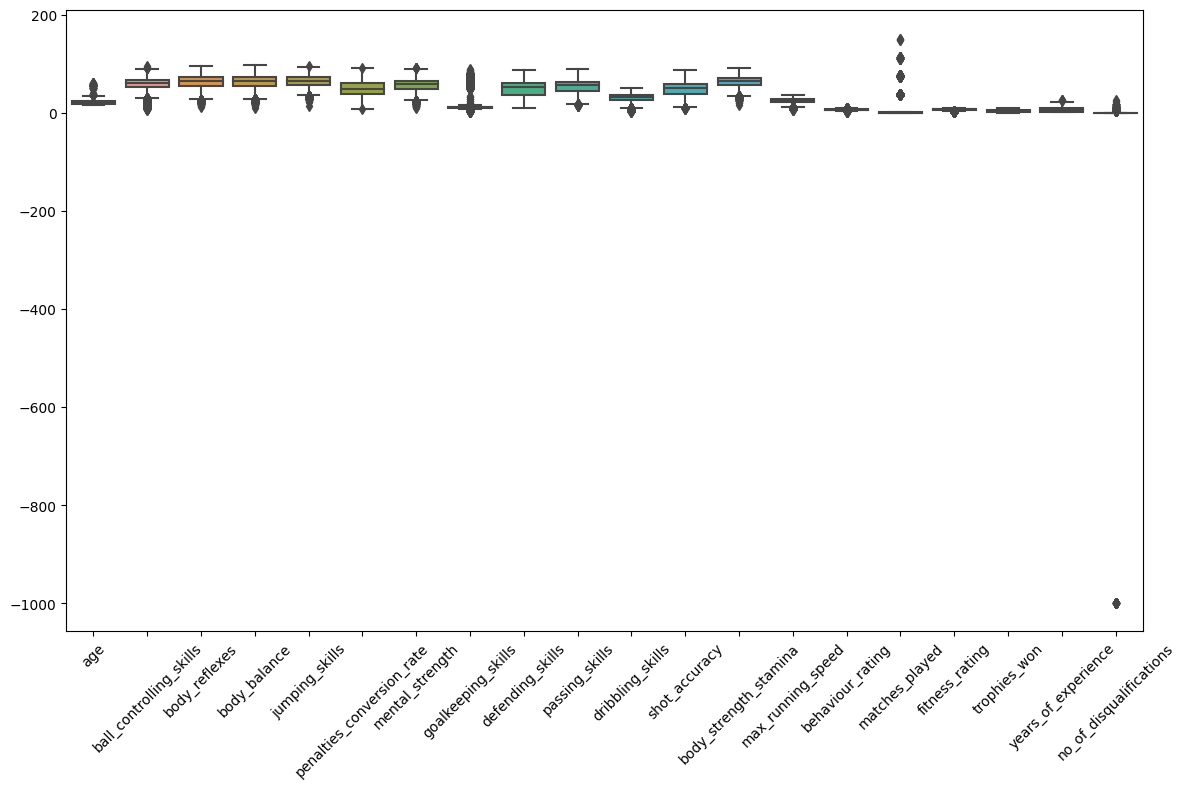

<ipython-input-6-2fbc7adab7e0>:29: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data[numeric_features].corr()


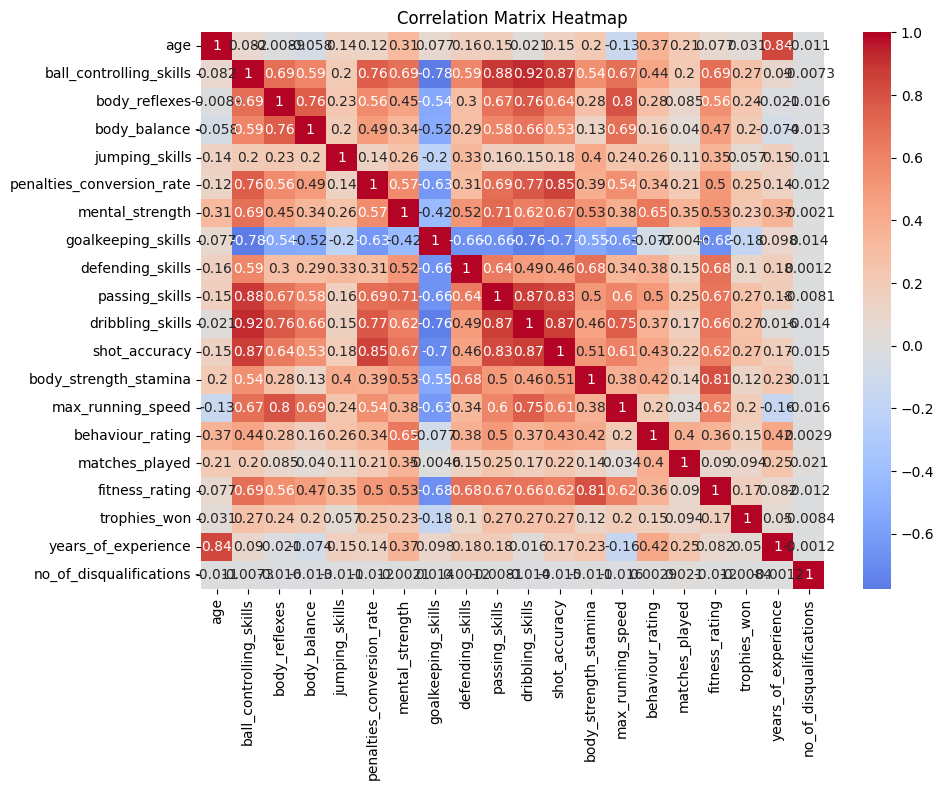

In [6]:


# Define  numeric features and categorical features
numeric_features = ['age', 'height', 'weight', 'ball_controlling_skills', 'body_reflexes', 'body_balance', 'jumping_skills', 'penalties_conversion_rate', 'mental_strength', 'goalkeeping_skills', 'defending_skills', 'passing_skills', 'dribbling_skills', 'shot_accuracy', 'body_strength_stamina', 'max_running_speed', 'behaviour_rating', 'matches_played', 'fitness_rating', 'trophies_won', 'dedication_level', 'coaching', 'years_of_experience', 'no_of_disqualifications']
categorical_features = ['gender', 'country', 'strong_foot', ...]

# Exploratory Data Analysis (EDA)

# Check for missing values
missing_values = data.isnull().sum()

# Summary statistics
summary_stats = data.describe()

# Data visualization

# Create histograms for numeric features
plt.figure(figsize=(12, 8))
data[numeric_features].hist(bins=20, edgecolor='black', alpha=0.7)
plt.tight_layout()
plt.show()

# Create box plots for numeric features
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[numeric_features])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Correlation matrix heatmap
correlation_matrix = data[numeric_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()




In [50]:
# Step 1: Check data types
print(data.dtypes)

# Step 2: Handle missing values
# For example, you can fill missing values in numerical columns with appropriate values
data['age'].fillna(data['age'].mean(), inplace=True)

# Step 3: Examine unique values
for col in data.columns:
    unique_vals = data[col].unique()
    print(f"Unique values in {col}: {unique_vals}")

player_id                     object
name                          object
age                            int64
gender                        object
country                       object
height                         int64
weight                        object
ball_controlling_skills      float64
body_reflexes                float64
body_balance                 float64
jumping_skills               float64
penalties_conversion_rate    float64
mental_strength              float64
goalkeeping_skills           float64
defending_skills             float64
passing_skills               float64
dribbling_skills             float64
shot_accuracy                float64
body_strength_stamina        float64
max_running_speed            float64
strong_foot                   object
behaviour_rating             float64
matches_played               float64
fitness_rating               float64
trophies_won                 float64
dedication_level              object
coaching                      object
y

In [16]:
# Display unique values in the 'height' and 'weight' columns
print(data['height'].unique())
print(data['weight'].unique())


[ 62. 510. 511.  58.  60.  61.  59.  56.  63.  57.  64.  66.  55.  65.
  71.  53.  67.  54. 121. 611.  68.  15.  95.  69. 110. 102.  52. 990.
 891.  83.  45.]
['176lbs' '148lbs' '172lbs' '165lbs' '158lbs' '174lbs' '168lbs' '183lbs'
 '185lbs' '156lbs' '202lbs' '154lbs' '161lbs' '145lbs' '143lbs' '152lbs'
 '163lbs' '146lbs' nan '192lbs' '181lbs' '190lbs' '196lbs' '141lbs'
 '150lbs' '169lbs' '179lbs' '160lbs' '157lbs' '187lbs' '137lbs' '171lbs'
 '134lbs' '170lbs' '139lbs' '140lbs' '159lbs' '184lbs' '178lbs' '151lbs'
 '162lbs' '138lbs' '182lbs' '200lbs' '136lbs' '189lbs' '149lbs' '167lbs'
 '201lbs' '198lbs' '123lbs' '194lbs' '132lbs' '127lbs' '193lbs' '126lbs'
 '212lbs' '207lbs' '180lbs' '147lbs' '130lbs' '173lbs' '205lbs' '209lbs'
 '203lbs' '191lbs' '195lbs' '128lbs' '129lbs' '211lbs' '125lbs' '216lbs'
 '121lbs' '214lbs' '117lbs' '206lbs' '225lbs' '204lbs' '220lbs' '110lbs'
 '223lbs' '218lbs' '118lbs' '119lbs' '227lbs' '243lbs' '234lbs' '213lbs'
 '215lbs']


In [31]:
from sklearn.impute import SimpleImputer

# ...

# Preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a model pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('model', RandomForestClassifier(random_state=42))])

# Fit the model
model.fit(X_train, y_train)




Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'height', 'weight',
                                                   'ball_controlling_skills',
                                                   'body_reflexes',
                                                   'body_balance',
                                                   'jumping_skills',
                                                   'penalties_conversion_rate',
                                                   'mental_strength',
                                                   'goalkeeping_skills',
                                                   'defending_skills',
                                                   'pa...g_skills',
                                                   'dribbling_skills',
                                                   'shot_accuracy',
                                                   'body_strength_stamina',
                                                   'max_running_speed',
                                                   'behaviour_rating',
                                                   'matches_played',
                                                   'fitness_rating',
                                                   'trophies_won',
                                                   'years_of_experience',
                                                   'no_of_disqualifications']),
                                                 ('cat', OneHotEncoder(),
                                                  ['gender', 'country',
                                                   'strong_foot',
                                                   'dedication_level',
                                                   'coaching'])])),
                ('model', RandomForestClassifier(random_state=42))])

In [32]:


# Fine-Tuning

# Hyperparameter grid for GridSearchCV
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20],
    # Add more hyperparameters
}

# Perform GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the best model
best_accuracy = accuracy_score(y_test, best_model.predict(X_test))

print(f"Initial Model Accuracy: {accuracy}")
print(f"Fine-Tuned Model Accuracy: {best_accuracy}")
print(f"Best Parameters: {best_params}")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "/usr/local/lib/python3.10/dist-packages/sklea

ValueError: ignored